<a href="https://colab.research.google.com/github/VoHuynhDuyThanh/AI/blob/main/Final_Project/Disease_Plant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from numpy import asarray, save

from keras.utils import load_img
from keras.utils import img_to_array
from keras.utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam
from keras import losses
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import LeakyReLU
from keras.losses import categorical_crossentropy

In [ ]:
# Augment data with ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Góc xoay trong khoảng từ -20 đến 20 độ
    width_shift_range=0.2,  # Dịch chuyển ngang trong khoảng từ -0.2 đến 0.2 độ
    height_shift_range=0.2,  # Dịch chuyển dọc trong khoảng từ -0.2 đến 0.2 độ
    shear_range=0.2,  # Co giãn trong khoảng từ -0.2 đến 0.2 độ
    zoom_range=0.2,  # Zoom trong khoảng từ 0.8 đến 1.2
    horizontal_flip=True,  # Lật ngang ảnh
    vertical_flip=True,  # Lật dọc ảnh
    brightness_range=[0.8, 1.2],  # Thay đổi độ sáng trong khoảng từ 0.8 đến 1.2
    channel_shift_range=50,  # Thay đổi màu sắc kênh trong khoảng từ -50 đến 50
    fill_mode='nearest'  # Điền vào các điểm bị thiếu bằng điểm gần nhất
)
train = train_datagen.flow_from_directory('/content/drive/MyDrive/Final_AI/train',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')
test = train_datagen.flow_from_directory('/content/drive/MyDrive/Final_AI/test',
                                               target_size=(64,64),
                                               batch_size=32,
                                               class_mode ='categorical')

Found 406 images belonging to 7 classes.
Found 71 images belonging to 7 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same',input_shape=(64,64,3)))
model.add(Conv2D(32,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(7,activation='softmax'))

model.summary()



Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 conv2d_61 (Conv2D)          (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 dropout_50 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_62 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 conv2d_63 (Conv2D)          (None, 32, 32, 64)        36928     
                                                     

In [ ]:
#Compile:
model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
# Training 
history = model.fit( train, validation_data=test, epochs=100, steps_per_epoch=len(train), 
                        validation_steps=len(test))

Epoch 1/100
13/13 [==============================] - 6s 362ms/step - loss: 2.4959 - accuracy: 0.1650 - val_loss: 1.9376 - val_accuracy: 0.1408
Epoch 2/100
13/13 [==============================] - 4s 276ms/step - loss: 1.9378 - accuracy: 0.1773 - val_loss: 1.9370 - val_accuracy: 0.1408
Epoch 3/100
13/13 [==============================] - 4s 273ms/step - loss: 1.9238 - accuracy: 0.2044 - val_loss: 1.8518 - val_accuracy: 0.2113
Epoch 4/100
13/13 [==============================] - 4s 313ms/step - loss: 1.8184 - accuracy: 0.2315 - val_loss: 1.8201 - val_accuracy: 0.1831
Epoch 5/100
13/13 [==============================] - 3s 268ms/step - loss: 1.8046 - accuracy: 0.2512 - val_loss: 1.7728 - val_accuracy: 0.4507
Epoch 6/100
13/13 [==============================] - 4s 257ms/step - loss: 1.7585 - accuracy: 0.3177 - val_loss: 1.5384 - val_accuracy: 0.4507
Epoch 7/100
13/13 [==============================] - 5s 382ms/step - loss: 1.7490 - accuracy: 0.2660 - val_loss: 1.6148 - val_accuracy: 0.4789

In [ ]:
model.save('/content/drive/MyDrive/Final_AI/model/CNN_plant.h5')

Test loss=  0.22954080998897552
Test accuracy=  0.9295774698257446


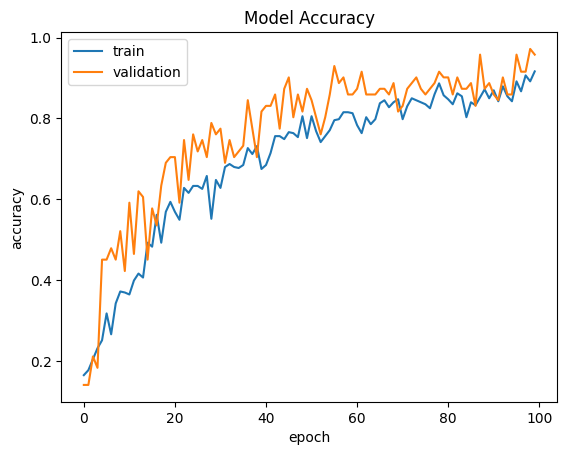

In [ ]:
import matplotlib.pyplot as plt
score = model.evaluate(test,verbose=0)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

Test loss: 0.09819760918617249
Test accunacy 0.98591548204422


Text(0.5, 1.0, 'Training & Testing Accuracy')

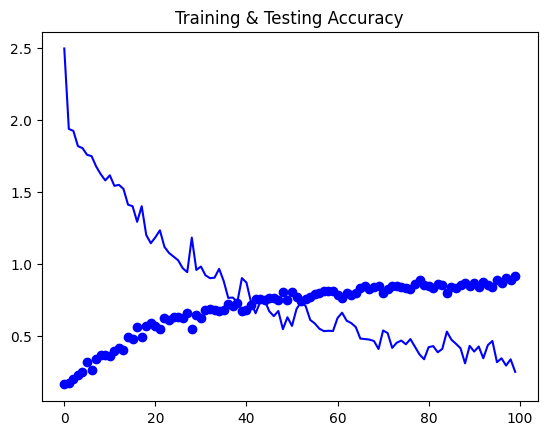

In [ ]:
eval = model.evaluate(test, verbose=0)
print('Test loss:', eval[0])
print('Test accunacy', eval[1])
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy,'bo', label = 'Traning Accuracy')
plt.plot(epochs, loss, 'b', label= 'Test Accuracy')
plt.title('Training & Testing Accuracy')

1/1 [==============================] - 0s 106ms/step
dom_la


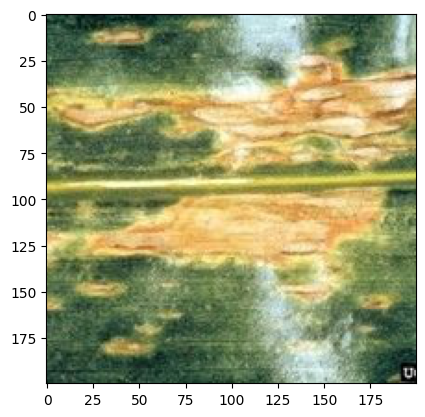

1/1 [==============================] - 0s 19ms/step
si_sat


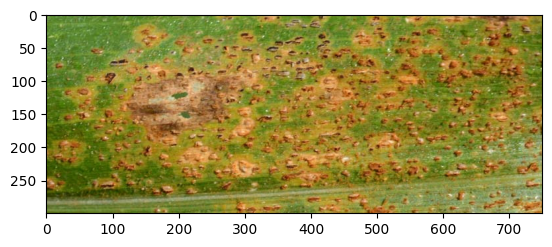

1/1 [==============================] - 0s 26ms/step
soi_den


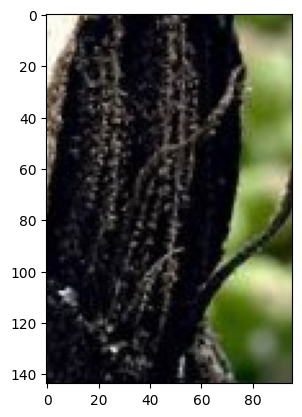

1/1 [==============================] - 0s 18ms/step
thieu_lan


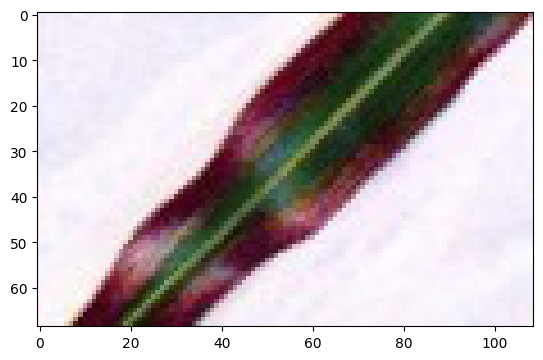

1/1 [==============================] - 0s 18ms/step
thieu_dam


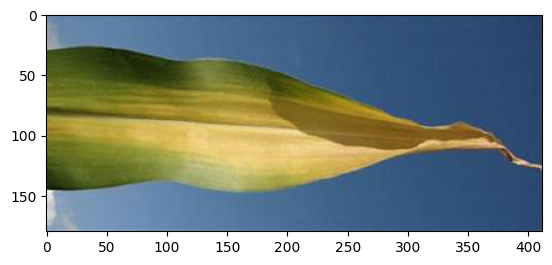

1/1 [==============================] - 0s 20ms/step
ung_thu


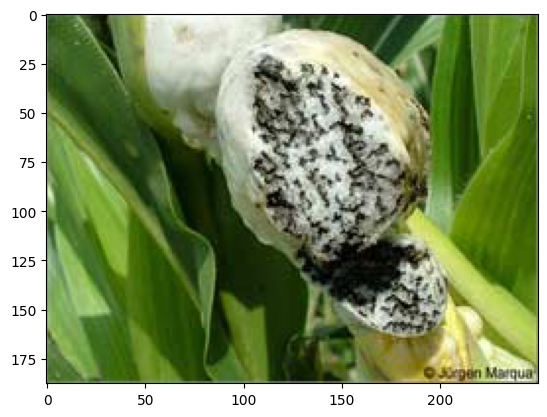

1/1 [==============================] - 0s 25ms/step
moc_hat


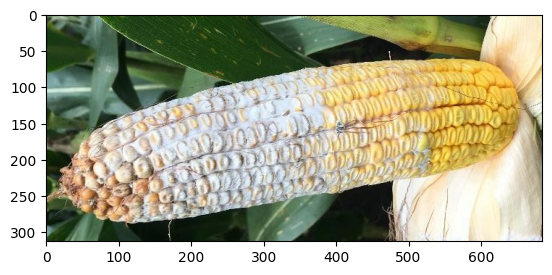

In [ ]:
folder = '/content/drive/MyDrive/Final_AI/val'
for file in listdir(folder):
  photo = load_img(folder + '/' +  file)
  plt.imshow(photo)
  
  photo = load_img(folder + '/' +  file, target_size = (64, 64))
  photo=img_to_array(photo)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['dom_la','moc_hat','si_sat','soi_den','thieu_dam','thieu_lan','ung_thu']
  print(class_name[result])
  plt.show()